In [1]:
#Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

<h1>1.Reading and Understanding Loan Data</h1>

In [3]:
loan=pd.read_csv("loan.csv")
loan.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
#checking datatype
print(loan.dtypes.to_markdown())

|                                | 0       |
|:-------------------------------|:--------|
| id                             | int64   |
| member_id                      | int64   |
| loan_amnt                      | int64   |
| funded_amnt                    | int64   |
| funded_amnt_inv                | float64 |
| term                           | object  |
| int_rate                       | object  |
| installment                    | float64 |
| grade                          | object  |
| sub_grade                      | object  |
| emp_title                      | object  |
| emp_length                     | object  |
| home_ownership                 | object  |
| annual_inc                     | float64 |
| verification_status            | object  |
| issue_d                        | object  |
| loan_status                    | object  |
| pymnt_plan                     | object  |
| url                            | object  |
| desc                           | object  |
| purpose 

In [5]:
#checking rows and columns of data
loan.shape

(39717, 111)

In [6]:
#Checking the statistical summary of data
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


<h1>2. Data Cleaning</h2>

<h2> Data quality check and manipulations (Treating outliers, missing values, datatype, standardisation etc)</h2>

In [7]:
#Missing values percentage in each column overview
print(((loan.isna().sum()/len(loan.index))*100).to_markdown())

|                                |            0 |
|:-------------------------------|-------------:|
| id                             |   0          |
| member_id                      |   0          |
| loan_amnt                      |   0          |
| funded_amnt                    |   0          |
| funded_amnt_inv                |   0          |
| term                           |   0          |
| int_rate                       |   0          |
| installment                    |   0          |
| grade                          |   0          |
| sub_grade                      |   0          |
| emp_title                      |   6.1913     |
| emp_length                     |   2.70665    |
| home_ownership                 |   0          |
| annual_inc                     |   0          |
| verification_status            |   0          |
| issue_d                        |   0          |
| loan_status                    |   0          |
| pymnt_plan                     |   0          |


<h3>There are lot of columns with 100% null values hence dropping such columns as they are of no use

In [8]:
loan_2=loan.dropna(axis=1, how='all')

In [9]:
#Check shape after the drop
loan_2.shape

(39717, 57)

<h3> Now we have 57 columns, lets check the unique count values in these columns

In [10]:
#checking unique values in each column
print(loan_2.nunique())

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

<li>columns with single doesnt contribute to the analysis,hence dropping off
<li>removing title,emp_title as its string values with high cardinality
<li>removing id and menber id as we dont need unique identifiers for our analysis

In [11]:
loan_3=loan_2.drop(["pymnt_plan","initial_list_status",'collections_12_mths_ex_med',"policy_code","application_type","acc_now_delinq", 
       "chargeoff_within_12_mths","delinq_amnt","tax_liens","id","member_id","title","emp_title"],axis=1)

<h3> Lets again check the missing values in data

In [12]:
(loan_3.isna().sum()/len(loan.index))*100

loan_amnt                   0.000000
funded_amnt                 0.000000
funded_amnt_inv             0.000000
term                        0.000000
int_rate                    0.000000
installment                 0.000000
grade                       0.000000
sub_grade                   0.000000
emp_length                  2.706650
home_ownership              0.000000
annual_inc                  0.000000
verification_status         0.000000
issue_d                     0.000000
loan_status                 0.000000
url                         0.000000
desc                       32.580507
purpose                     0.000000
zip_code                    0.000000
addr_state                  0.000000
dti                         0.000000
delinq_2yrs                 0.000000
earliest_cr_line            0.000000
inq_last_6mths              0.000000
mths_since_last_delinq     64.662487
mths_since_last_record     92.985372
open_acc                    0.000000
pub_rec                     0.000000
r

<li>More than 65% missing values are present in columns mths_since_last_delinq,mths_since_last_record,next_pymnt_d hence dropping it 
<li>removing desc as it has texual data


In [13]:
loan_4=loan_3.drop(["mths_since_last_delinq","mths_since_last_record","next_pymnt_d","desc"],axis=1)

<h3>There are a lot of customer behaviour columns which are recorded once the loan is accepted, hence we will be dropping them off as they will not help in the analysis</h3>
<li>collection_recovery_fee=post charge off collection fee
<li>last_credit_pull_d=The most recent month LC pulled credit for this loan
<li>last_pymnt_amnt=Last total payment amount received
<li>last_pymnt_t=Last month payment was received
<li>out_prncp=Remaining outstanding principal for total amount funded
<li>out_prncp_inv=Remaining outstanding principal for portion of total amount funded by investors
<li>total_pymnt=Payments received to date for total amount funded
<li>total_pymnt_inv=Payments received to date for portion of total amount funded by investors
<li>total_rec_int=Interest received to date
<li>total_rec_late_fee=Late fees received to date
<li>recoveries=post charge off gross recovery
<li>total_rec_prncp=Principal received to date
<li>url=URL for the LC page with listing data
<li>delinq_2yrs=The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
<li>inq_last_6mths=The number of inquiries in past 6 months (excluding auto and mortgage inquiries)






In [14]:
loan_5=loan_4.drop(["last_credit_pull_d","collection_recovery_fee","last_pymnt_amnt","last_pymnt_d","recoveries",
                    "out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_int","total_rec_late_fee",
                    "total_rec_prncp","url","delinq_2yrs","inq_last_6mths"],axis=1)

In [15]:
loan_5.isna().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1075
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
zip_code                   0
addr_state                 0
dti                        0
earliest_cr_line           0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                50
total_acc                  0
pub_rec_bankruptcies     697
dtype: int64

<h3>Lets Treat the missing values in emp_length, revol_util and pub_rec_bankruptcies

In [16]:
#Treating emp_length missing values (categorical hence taking mode)
loan_5["emp_length"].mode()

0    10+ years
dtype: object

In [17]:
# filling missing values
# with mode column values
loan_5.emp_length.fillna(loan_5.emp_length.mode()[0],inplace=True)

In [18]:
loan_5.isna().sum()

loan_amnt                 0
funded_amnt               0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_length                0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
zip_code                  0
addr_state                0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util               50
total_acc                 0
pub_rec_bankruptcies    697
dtype: int64

In [19]:
#Treating missing values for pub_rec_bankruptcies (categorical hence taking mode)
loan_5.pub_rec_bankruptcies.mode()
loan_5.pub_rec_bankruptcies.fillna(loan_5.pub_rec_bankruptcies.mode()[0],inplace=True)

In [20]:
loan_5.isna().sum()

loan_amnt                0
funded_amnt              0
funded_amnt_inv          0
term                     0
int_rate                 0
installment              0
grade                    0
sub_grade                0
emp_length               0
home_ownership           0
annual_inc               0
verification_status      0
issue_d                  0
loan_status              0
purpose                  0
zip_code                 0
addr_state               0
dti                      0
earliest_cr_line         0
open_acc                 0
pub_rec                  0
revol_bal                0
revol_util              50
total_acc                0
pub_rec_bankruptcies     0
dtype: int64

In [21]:
#Treating revol_util - as the count of missing values is low(0.12%) we can drop the rows
loan_6=loan_5[(~loan_5["revol_util"].isna())]

In [22]:
loan_6.isna().sum()

loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
zip_code                0
addr_state              0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
pub_rec_bankruptcies    0
dtype: int64

<h3> All missing values are treated now we have 25 columns

In [23]:
loan_6.shape

(39667, 25)

<h3> Our target variable is loan_status as it will be instrumental in our analysis, hence lets check its distribution once

<AxesSubplot:ylabel='loan_status'>

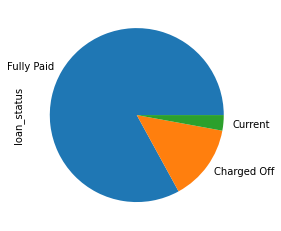

In [24]:
loan_6.loan_status.value_counts().plot(kind='pie')

<h3>As our analysis want to know the applicants who might default we will only consider loan status for "fully paid" and "charged off" as we cant gain anything from "current" loan status as its still in progress

In [25]:
loan_6=loan_6[~(loan_6.loan_status=="Current")]

In [26]:
loan_6.loan_status.value_counts()

Fully Paid     32916
Charged Off     5611
Name: loan_status, dtype: int64

<h2>Standardisation of data

In [27]:
loan_6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38527 entries, 0 to 39716
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38527 non-null  int64  
 1   funded_amnt           38527 non-null  int64  
 2   funded_amnt_inv       38527 non-null  float64
 3   term                  38527 non-null  object 
 4   int_rate              38527 non-null  object 
 5   installment           38527 non-null  float64
 6   grade                 38527 non-null  object 
 7   sub_grade             38527 non-null  object 
 8   emp_length            38527 non-null  object 
 9   home_ownership        38527 non-null  object 
 10  annual_inc            38527 non-null  float64
 11  verification_status   38527 non-null  object 
 12  issue_d               38527 non-null  object 
 13  loan_status           38527 non-null  object 
 14  purpose               38527 non-null  object 
 15  zip_code           

In [28]:
#checking values for home_ownership
loan_6.home_ownership.value_counts()

RENT        18448
MORTGAGE    17010
OWN          2970
OTHER          96
NONE            3
Name: home_ownership, dtype: int64

In [29]:
#replacing 'NONE' with 'OTHERS' as "None" just have a count values of 3
loan_6.home_ownership.replace(to_replace = ['NONE'],value='OTHER',inplace = True)

<h3> Removing extra characters</h3>
<li>there is int_rate and revol_util which should be continuous variable( removing %)
<li>term is of object type lets convert in to integer (removing months)
<li>emp_length has some values as &lt;1 which should be 0 and >10 as 10

In [30]:
loan_6["int_rate"]=loan_6["int_rate"].apply(lambda x:x.split("%")[0])
loan_6["revol_util"]=loan_6["revol_util"].apply(lambda x:x.split("%")[0])
loan_6["term"]=loan_6["term"].apply(lambda x:x.split("months")[0])
loan_6["emp_length"]=loan_6["emp_length"].apply(lambda x:0 if "<" in x else x.split("+")[0] if "+" in x else x.split()[0])
loan_6

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,zip_code,addr_state,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,...,860xx,AZ,27.65,Jan-85,3,0,13648,83.70,9,0.0
1,2500,2500,2500.0,60,15.27,59.83,C,C4,0,RENT,...,309xx,GA,1.00,Apr-99,3,0,1687,9.40,4,0.0
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,...,606xx,IL,8.72,Nov-01,2,0,2956,98.50,10,0.0
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,...,917xx,CA,20.00,Feb-96,10,0,5598,21,37,0.0
5,5000,5000,5000.0,36,7.90,156.46,A,A4,3,RENT,...,852xx,AZ,11.20,Nov-04,9,0,7963,28.30,12,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075.0,36,8.07,78.42,A,A4,4,MORTGAGE,...,802xx,CO,11.33,Nov-90,13,0,7274,13.10,40,0.0
39713,8500,8500,875.0,36,10.28,275.38,C,C1,3,RENT,...,274xx,NC,6.40,Dec-86,6,0,8847,26.90,9,0.0
39714,5000,5000,1325.0,36,8.07,156.84,A,A4,0,MORTGAGE,...,017xx,MA,2.30,Oct-98,11,0,9698,19.40,20,0.0
39715,5000,5000,650.0,36,7.43,155.38,A,A2,0,MORTGAGE,...,208xx,MD,3.72,Nov-88,17,0,85607,0.70,26,0.0


<h3>Correcting datatypes

In [31]:
data_types_dict = {'int_rate': float, "revol_util":float,"pub_rec_bankruptcies":int,"term":int,"emp_length":int}
loan_6=loan_6.astype(data_types_dict)
loan_6.dtypes

loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                      int64
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_length                int64
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
zip_code                 object
addr_state               object
dti                     float64
earliest_cr_line         object
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util              float64
total_acc                 int64
pub_rec_bankruptcies      int64
dtype: object

<h3>Outlier detection and treatment

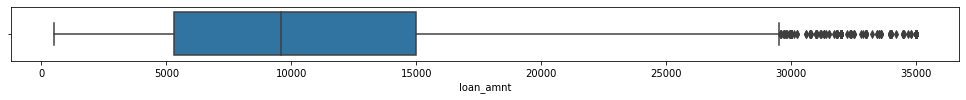

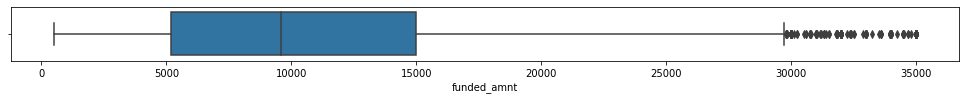

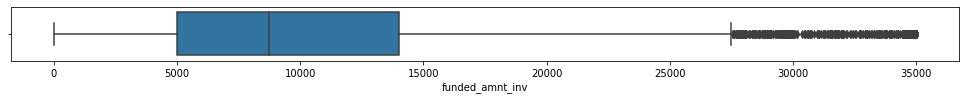

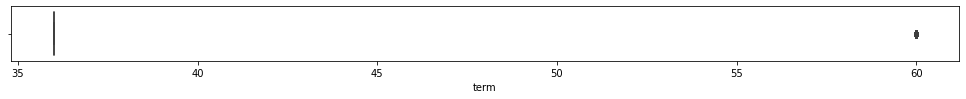

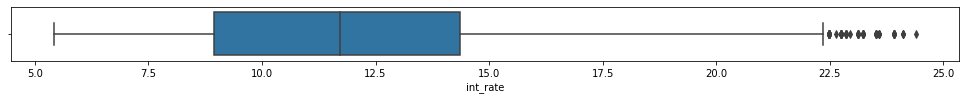

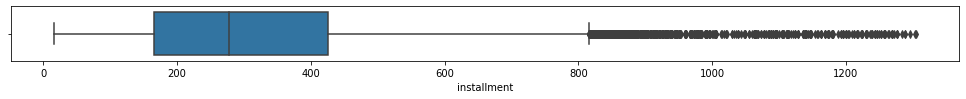

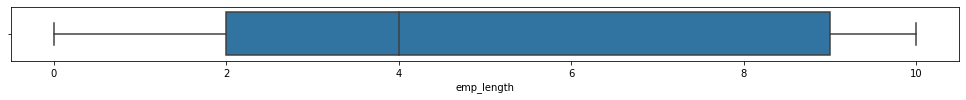

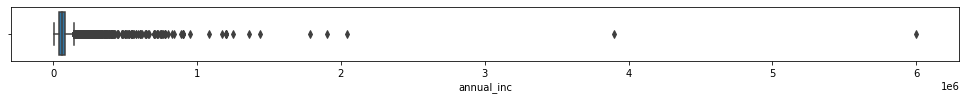

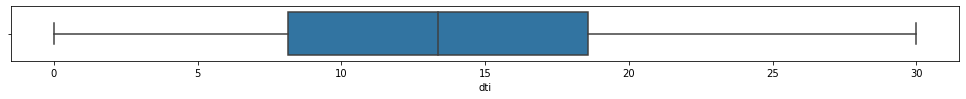

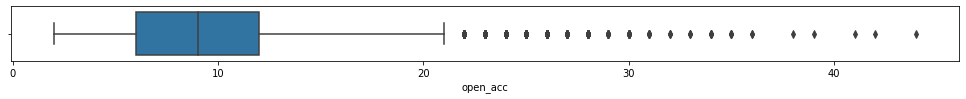

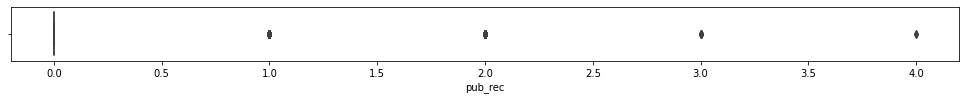

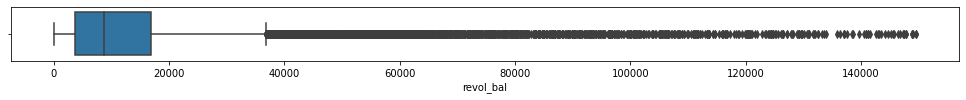

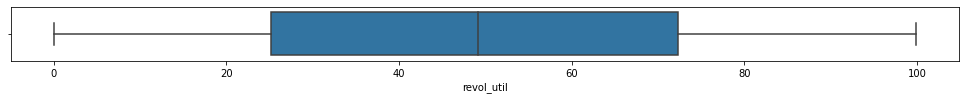

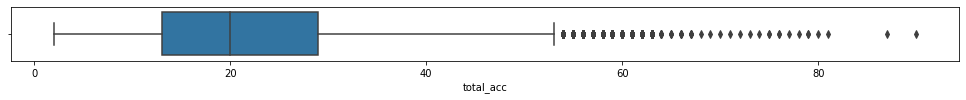

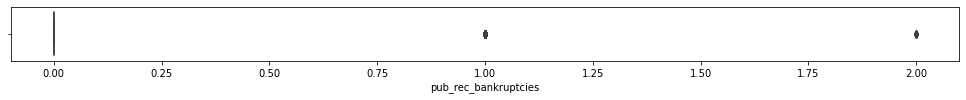

In [32]:
#Plotting box plots outlier detection
loan_7=loan_6.select_dtypes(exclude=['object'])
for column in loan_7:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=loan_7, x=column)

we can see outliers in annual_inc,total_acc and open_acc ,lets see its variability

In [33]:
loan_7=loan_6.copy(deep=True)
loan_7.shape

(38527, 25)

In [34]:
var_quant_info = loan_7.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
var_quant_info

0.50     59000.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234000.0
Name: annual_inc, dtype: float64

In [35]:
var_quant_info = loan_7.total_acc.quantile([0.5, 0.75,0.90,0.91,0.92, 0.95, 0.97,0.98, 0.99])
var_quant_info

0.50    20.0
0.75    29.0
0.90    38.0
0.91    38.0
0.92    39.0
0.95    43.0
0.97    48.0
0.98    51.0
0.99    56.0
Name: total_acc, dtype: float64

In [36]:
var_quant_info = loan_7.open_acc.quantile([0.5, 0.75,0.90,0.91,0.92, 0.95, 0.97,0.98, 0.99])
var_quant_info

0.50     9.0
0.75    12.0
0.90    15.0
0.91    16.0
0.92    16.0
0.95    17.0
0.97    19.0
0.98    20.0
0.99    22.0
Name: open_acc, dtype: float64

In [37]:
loan_7.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
count,38527.000000,38527.000000,38527.000000,38527.000000,38527.000000,38527.000000,38527.000000,3.852700e+04,38527.000000,38527.000000,38527.000000,38527.000000,38527.000000,38527.000000,38527.000000
mean,11055.265139,10791.956939,10230.940095,41.904223,11.927378,322.678650,5.078594,6.880923e+04,13.276353,9.281413,0.055442,13305.458795,48.702777,22.067615,0.042723
std,7348.433587,7090.256225,7022.678989,10.336550,3.690161,208.649278,3.603060,6.421493e+04,6.671392,4.400158,0.237853,15868.644361,28.364741,11.422526,0.202876
min,500.000000,500.000000,0.000000,36.000000,5.420000,15.690000,0.000000,4.000000e+03,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,5325.000000,5200.000000,5000.000000,36.000000,8.940000,165.740000,2.000000,4.000000e+04,8.140000,6.000000,0.000000,3667.000000,25.200000,13.000000,0.000000
50%,9600.000000,9600.000000,8750.000000,36.000000,11.710000,278.150000,4.000000,5.900000e+04,13.370000,9.000000,0.000000,8777.000000,49.100000,20.000000,0.000000
75%,15000.000000,15000.000000,14000.000000,36.000000,14.350000,425.860000,9.000000,8.200000e+04,18.560000,12.000000,0.000000,16930.000000,72.300000,29.000000,0.000000
max,35000.000000,35000.000000,35000.000000,60.000000,24.400000,1305.190000,10.000000,6.000000e+06,29.990000,44.000000,4.000000,149588.000000,99.900000,90.000000,2.000000


variability in open_acc and total_acc is not that significant compared annual_inc hence filtering the outliers

In [38]:
annual_inc_95_perc = loan_7['annual_inc'].quantile(0.95)
loan_8 = loan_7[loan_7["annual_inc"] <= annual_inc_95_perc]
loan_8.shape

(36606, 25)

<h1>3.Univariate Analysis</h1>

<function matplotlib.pyplot.show(close=None, block=None)>

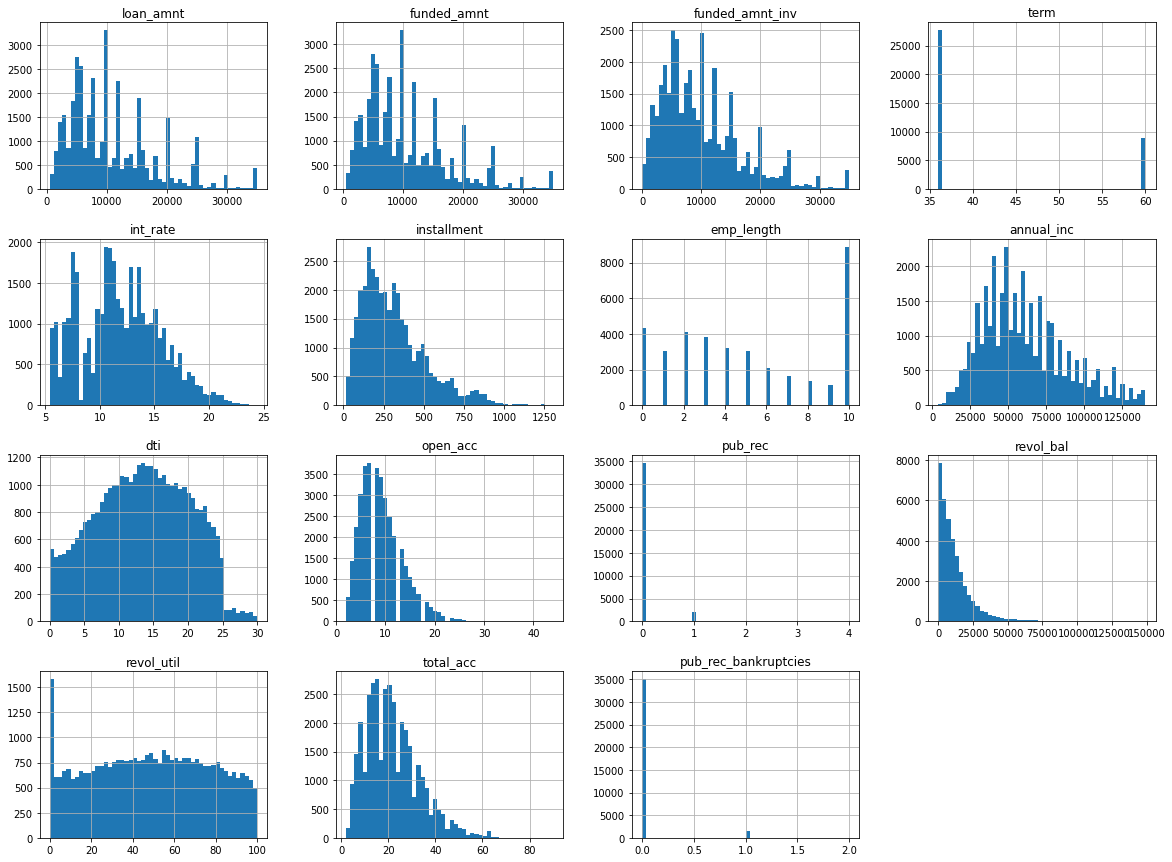

In [39]:
#check distribution of all the variables in loan data
loan_8.hist(bins = 50, figsize = (20,15))
plt.show


<li>revol_bal is higly left skewed and we will assume the applicant are applying for loan first time hence we will drop these columns related to credit information of applicant (revol_bal,revol_util)
<li>zip_code has high cardianality hence barring it from univariate analysis, we have addr_state for getting demographics information of applicant hence we can drop zip_code

In [40]:
loan_8.drop(["revol_bal","zip_code","revol_util"],axis=1)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,issue_d,loan_status,purpose,addr_state,dti,earliest_cr_line,open_acc,pub_rec,total_acc,pub_rec_bankruptcies
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,...,Dec-11,Fully Paid,credit_card,AZ,27.65,Jan-85,3,0,9,0
1,2500,2500,2500.0,60,15.27,59.83,C,C4,0,RENT,...,Dec-11,Charged Off,car,GA,1.00,Apr-99,3,0,4,0
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,...,Dec-11,Fully Paid,small_business,IL,8.72,Nov-01,2,0,10,0
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,...,Dec-11,Fully Paid,other,CA,20.00,Feb-96,10,0,37,0
5,5000,5000,5000.0,36,7.90,156.46,A,A4,3,RENT,...,Dec-11,Fully Paid,wedding,AZ,11.20,Nov-04,9,0,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39711,5000,5000,700.0,36,8.70,158.30,B,B1,5,MORTGAGE,...,Jul-07,Fully Paid,credit_card,CO,15.55,May-94,10,0,29,0
39712,2500,2500,1075.0,36,8.07,78.42,A,A4,4,MORTGAGE,...,Jul-07,Fully Paid,home_improvement,CO,11.33,Nov-90,13,0,40,0
39713,8500,8500,875.0,36,10.28,275.38,C,C1,3,RENT,...,Jul-07,Fully Paid,credit_card,NC,6.40,Dec-86,6,0,9,0
39714,5000,5000,1325.0,36,8.07,156.84,A,A4,0,MORTGAGE,...,Jul-07,Fully Paid,debt_consolidation,MA,2.30,Oct-98,11,0,20,0


<h3> Segmented univariate Analysis

array([31204,  5402])

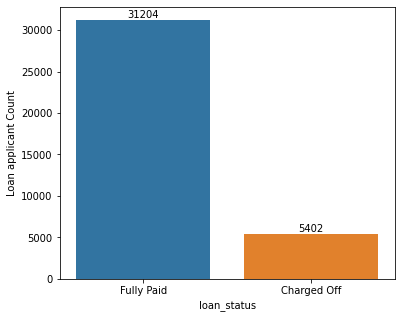

In [41]:
#Distribution of loan applicants across loan_status (fully paid or charged off)
fig, ax = plt.subplots(figsize=(6, 5))
ax=sns.countplot(x='loan_status', data=loan_8,ax=ax)
abs_values = loan_8['loan_status'].value_counts(ascending=False).values
ax.bar_label(ax.containers[0])
ax.set_ylabel('Loan applicant Count')
abs_values

Text(0, 0.5, 'Defaulter Count')

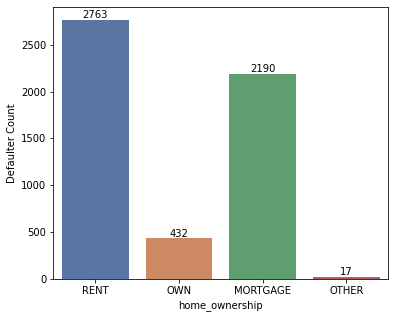

In [42]:
#Distribution of loan deafulters across home_ownership
fig, ax = plt.subplots(figsize=(6, 5))
ax=sns.countplot(x='home_ownership', data=loan_8[loan_8['loan_status']=='Charged Off'],ax=ax,palette="deep")
ax.bar_label(ax.containers[0])
ax.set_ylabel('Defaulter Count')

Text(0, 0.5, 'Defaulter Count')

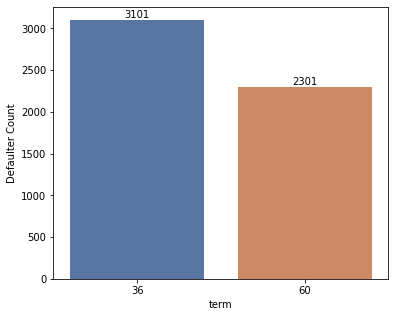

In [43]:
#Distribution of loan defaulters across loan term
fig, ax = plt.subplots(figsize=(6, 5))
ax=sns.countplot(x='term', data=loan_8[loan_8['loan_status']=='Charged Off'].sort_values(by="term"),ax=ax,palette="deep")
ax.bar_label(ax.containers[0])
ax.set_ylabel('Defaulter Count')

Text(0.5, 0, 'Loan Grade')

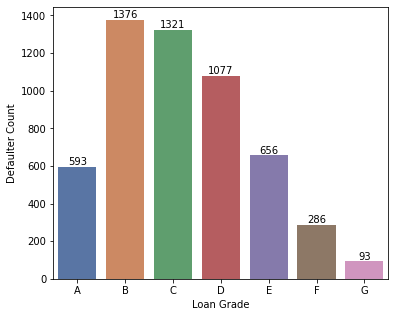

In [44]:
#Distribution of loan defaulters across loan grade
fig, ax = plt.subplots(figsize=(6, 5))
ax=sns.countplot(x='grade', data=loan_8[loan_8['loan_status']=='Charged Off'].sort_values(by="grade"),ax=ax,palette="deep")
ax.bar_label(ax.containers[0])
ax.set_ylabel('Defaulter Count')
ax.set_xlabel('Loan Grade')

Text(0.5, 0, 'Loan Sub-Grade')

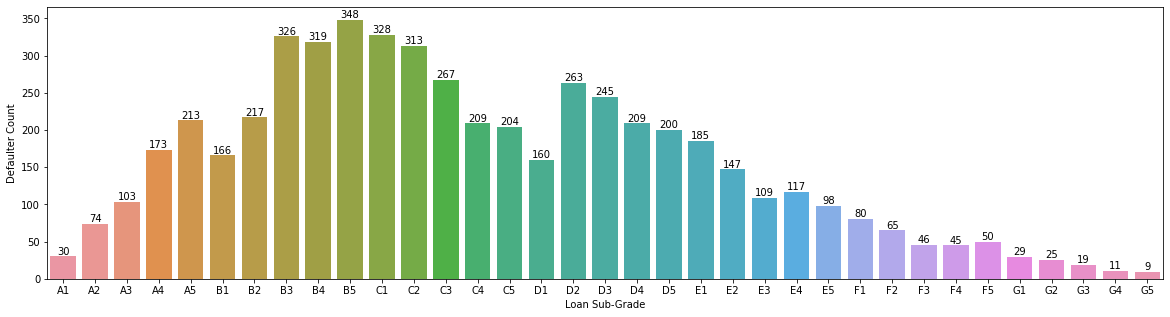

In [45]:
#Distribution of loan defaulters across loan subgrade
fig, ax = plt.subplots(figsize=(20, 5))
ax=sns.countplot(x='sub_grade', data=loan_8[loan_8['loan_status']=='Charged Off'].sort_values(by="sub_grade"),ax=ax)
ax.bar_label(ax.containers[0])
ax.set_ylabel('Defaulter Count')
ax.set_xlabel('Loan Sub-Grade')

Text(0.5, 0, 'Employment Duration(In years)')

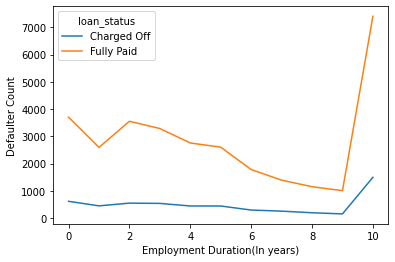

In [46]:
#Distribution of loan defaulters across employment duration (emp_length)
ax=loan_8.groupby("emp_length")["loan_status"].value_counts().unstack().plot()
ax.set_ylabel('Defaulter Count')
ax.set_xlabel('Employment Duration(In years)')


Text(0.5, 0, 'Loan verification status')

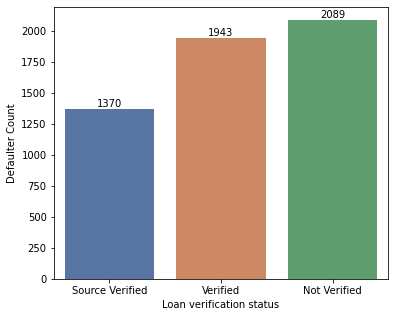

In [47]:
#Distribution of loan defaulters across loan verification_status
fig, ax = plt.subplots(figsize=(6, 5))
ax=sns.countplot(x='verification_status', data=loan_8[loan_8['loan_status']=='Charged Off'],ax=ax,palette="deep")
ax.bar_label(ax.containers[0])
ax.set_ylabel('Defaulter Count')
ax.set_xlabel('Loan verification status')

Text(0.5, 0, 'Loan purpose')

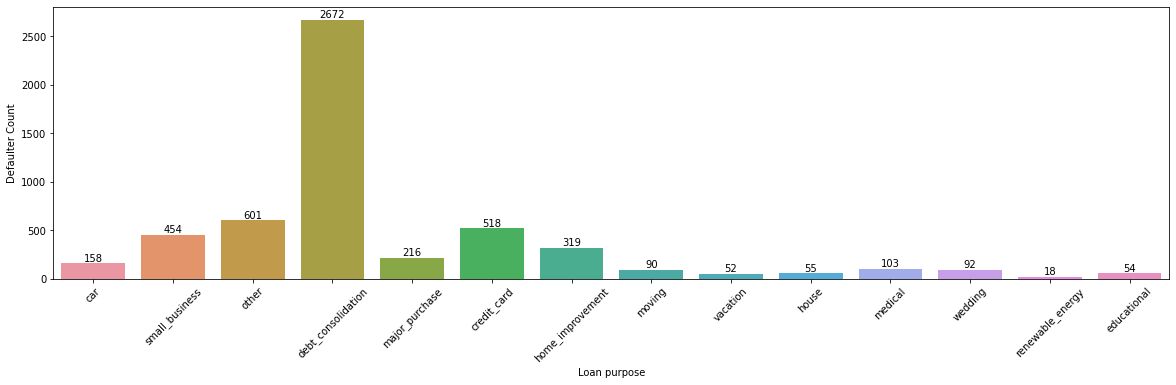

In [48]:
#Distribution of loan defaulters across loan purpose
fig, ax = plt.subplots(figsize=(20, 5))
ax=sns.countplot(x='purpose', data=loan_8[loan_8['loan_status']=='Charged Off'],ax=ax)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45)
ax.set_ylabel('Defaulter Count')
ax.set_xlabel('Loan purpose')

Text(0.5, 0, 'Address States')

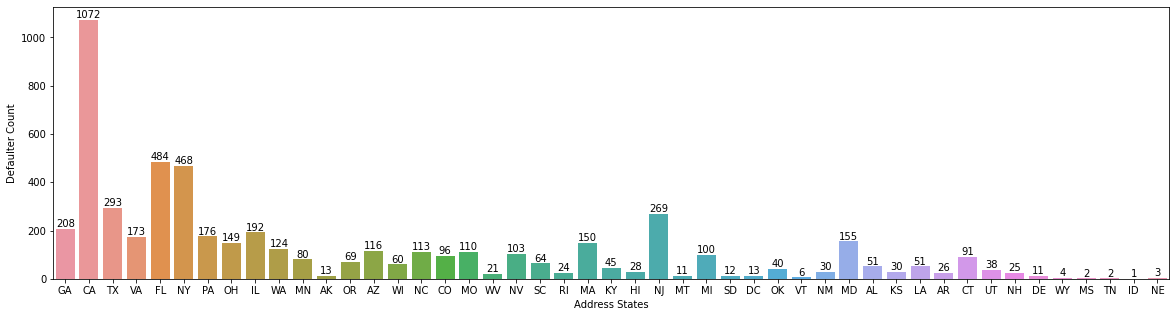

In [49]:
#Distribution of loan defaulters across applicants address (US states code)
fig, ax = plt.subplots(figsize=(20, 5))
ax=sns.countplot(x='addr_state', data=loan_8[loan_8['loan_status']=='Charged Off'],ax=ax)
ax.bar_label(ax.containers[0])
ax.set_ylabel('Defaulter Count')
ax.set_xlabel('Address States')

Text(0.5, 0, 'No. of derogatory public record ')

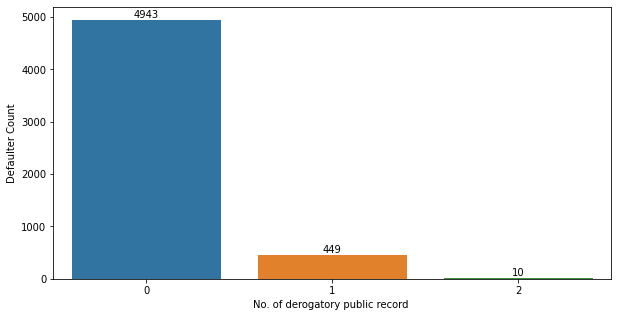

In [50]:
#Distribution of loan deafulters across no. of derogatory public record 
fig, ax = plt.subplots(figsize=(10, 5))
ax=sns.countplot(x='pub_rec', data=loan_8[loan_8['loan_status']=='Charged Off'],ax=ax)
ax.bar_label(ax.containers[0])
ax.set_ylabel('Defaulter Count')
ax.set_xlabel('No. of derogatory public record ')

Text(0.5, 0, 'No. of bankruptcy public record ')

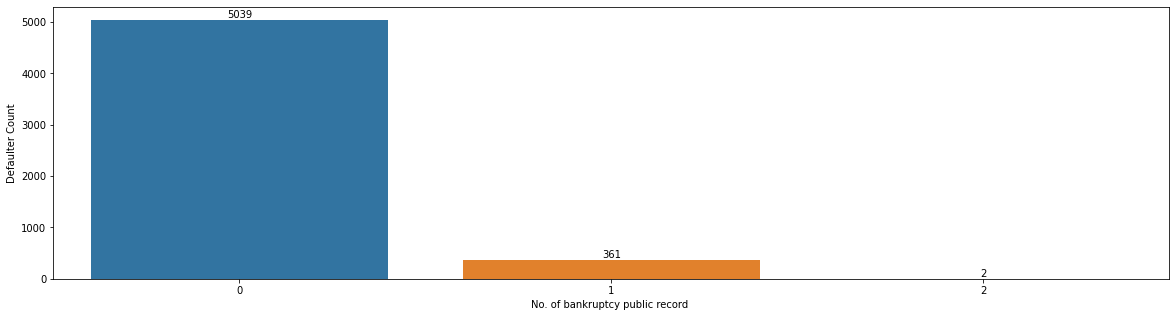

In [51]:
#Distribution of loan deafulters across no. of bankruptcy public record 
fig, ax = plt.subplots(figsize=(20, 5))
ax=sns.countplot(x='pub_rec_bankruptcies', data=loan_8[loan_8['loan_status']=='Charged Off'],ax=ax)
ax.bar_label(ax.containers[0])
ax.set_ylabel('Defaulter Count')
ax.set_xlabel('No. of bankruptcy public record ')

<h3> Derived Metrics

In [52]:
#Extracting month and year from loan issue date (derived metrics)
loan_8[["loan_month", "loan_year"]] = loan_8["issue_d"].str.split("-", expand = True)
loan_8["loan_year"]="20"+loan_8["loan_year"]
loan_8

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,loan_month,loan_year
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,...,27.65,Jan-85,3,0,13648,83.7,9,0,Dec,2011
1,2500,2500,2500.0,60,15.27,59.83,C,C4,0,RENT,...,1.00,Apr-99,3,0,1687,9.4,4,0,Dec,2011
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,...,8.72,Nov-01,2,0,2956,98.5,10,0,Dec,2011
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,...,20.00,Feb-96,10,0,5598,21.0,37,0,Dec,2011
5,5000,5000,5000.0,36,7.90,156.46,A,A4,3,RENT,...,11.20,Nov-04,9,0,7963,28.3,12,0,Dec,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39711,5000,5000,700.0,36,8.70,158.30,B,B1,5,MORTGAGE,...,15.55,May-94,10,0,66033,23.0,29,0,Jul,2007
39712,2500,2500,1075.0,36,8.07,78.42,A,A4,4,MORTGAGE,...,11.33,Nov-90,13,0,7274,13.1,40,0,Jul,2007
39713,8500,8500,875.0,36,10.28,275.38,C,C1,3,RENT,...,6.40,Dec-86,6,0,8847,26.9,9,0,Jul,2007
39714,5000,5000,1325.0,36,8.07,156.84,A,A4,0,MORTGAGE,...,2.30,Oct-98,11,0,9698,19.4,20,0,Jul,2007


Text(0.5, 0, 'Loan issue year')

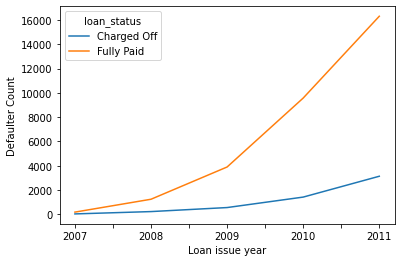

In [53]:
#Distribution of loan deafulters across loan issue year
ax=loan_8.groupby("loan_year")["loan_status"].value_counts().unstack().plot()
ax.set_ylabel('Defaulter Count')
ax.set_xlabel('Loan issue year')

Text(0.5, 0, 'Loan Amount')

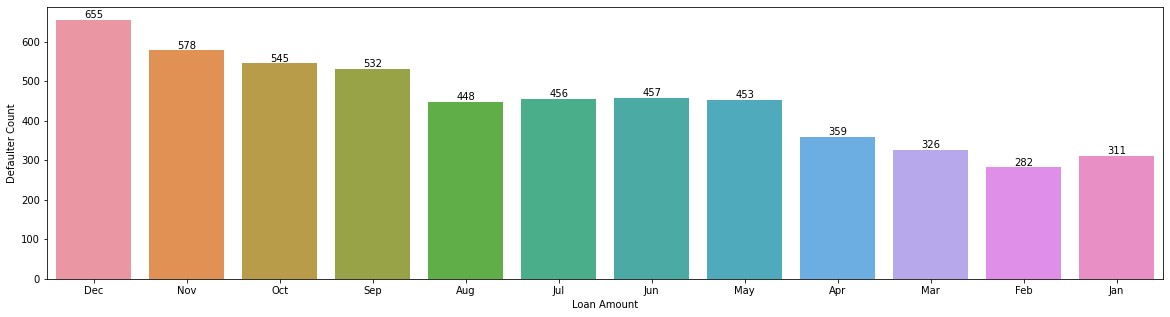

In [104]:
#Distribution of loan deafulters across loan issue month 
fig, ax = plt.subplots(figsize=(20, 5))
ax=sns.countplot(x='loan_month', data=loan_8[loan_8['loan_status']=='Charged Off'],ax=ax)
ax.bar_label(ax.containers[0])
ax.set_ylabel('Defaulter Count')
ax.set_xlabel('Loan Issue month')

<h3> Analysing numerical columns by making them categorical by bucketing

In [55]:
loan_8.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
count,36606.000000,36606.000000,36606.000000,36606.000000,36606.000000,36606.000000,36606.000000,36606.000000,36606.000000,36606.000000,36606.000000,36606.000000,36606.000000,36606.000000,36606.000000
mean,10690.058324,10443.630143,9902.311039,41.854778,11.883216,312.088564,5.044665,60890.563839,13.450146,9.173086,0.056849,12327.672567,48.659741,21.655630,0.043927
std,7048.412687,6800.581494,6730.696329,10.307238,3.666065,199.238384,3.595980,27741.337421,6.660418,4.351894,0.240355,13768.939726,28.282836,11.229937,0.205601
min,500.000000,500.000000,0.000000,36.000000,5.420000,15.690000,0.000000,4000.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,5000.000000,5000.000000,4988.276705,36.000000,8.940000,163.110000,2.000000,40000.000000,8.350000,6.000000,0.000000,3573.250000,25.300000,13.000000,0.000000
50%,9250.000000,9000.000000,8396.342174,36.000000,11.710000,270.845000,4.000000,56000.000000,13.580000,8.000000,0.000000,8515.000000,49.000000,20.000000,0.000000
75%,15000.000000,14400.000000,13649.999283,36.000000,14.270000,408.902500,9.000000,78000.000000,18.720000,12.000000,0.000000,16163.250000,72.100000,28.000000,0.000000
max,35000.000000,35000.000000,35000.000000,60.000000,24.400000,1305.190000,10.000000,140004.000000,29.990000,44.000000,4.000000,149000.000000,99.900000,90.000000,2.000000


In [56]:
#creating bins for continous variables for making them categorical- int_rate,open_acc,revol_util,total_acc
loan_8['loan_amnt_grp'] = pd.cut(loan_8['loan_amnt'], bins=7,precision = 0,labels=['0K-5K','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','10k-35k'])
loan_8['funded_amnt_inv_grp'] = pd.cut(loan_8['funded_amnt_inv'], bins=7,precision = 0,labels=['0K-5K','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','10k-35k'])
loan_8['int_rate_grp'] = pd.cut(loan_8['int_rate'], bins=4,precision =0,labels=['5%-10%','10%-15%','15%-20%','20%-25%'])
loan_8['installment_grp'] = pd.cut(loan_8['installment'], bins=7,precision = 0,labels=['0-200','200-400','400-600','600-800','800-1000','1000-1200','1200-1400'])
loan_8['annual_inc_grp'] = pd.cut(loan_8['annual_inc'], bins=5,precision = 0,labels =['0k-30k','30k-60k','60k-90k','90k-120k','120k-150k'])
loan_8['dti_grp'] = pd.cut(loan_8['dti'], bins=6,precision =0,labels=['0%-5%','5%-10%','10%-15%','15%-20%','20%-25%','25%-30%'])
loan_8['open_acc_grp'] = pd.cut(loan_8['open_acc'],bins = 5,precision = 0,labels=['2-10','10-19','19-27','27-36','36-44'])
loan_8['total_acc_grp'] = pd.cut(loan_8['total_acc'], bins=5,precision = 0,labels=['2-20','20-37','37-55','55-74','74-90'])


Text(0.5, 0, 'Loan Amount')

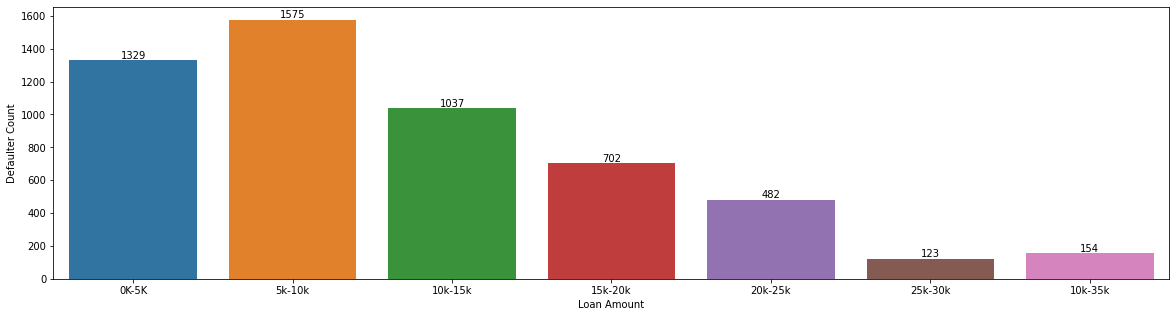

In [57]:
#Distribution of loan deafulters across loan amount groups 
fig, ax = plt.subplots(figsize=(20, 5))
ax=sns.countplot(x='loan_amnt_grp', data=loan_8[loan_8['loan_status']=='Charged Off'],ax=ax)
ax.bar_label(ax.containers[0])
ax.set_ylabel('Defaulter Count')
ax.set_xlabel('Loan Amount')

Text(0.5, 0, 'Loan Amount funded by investors')

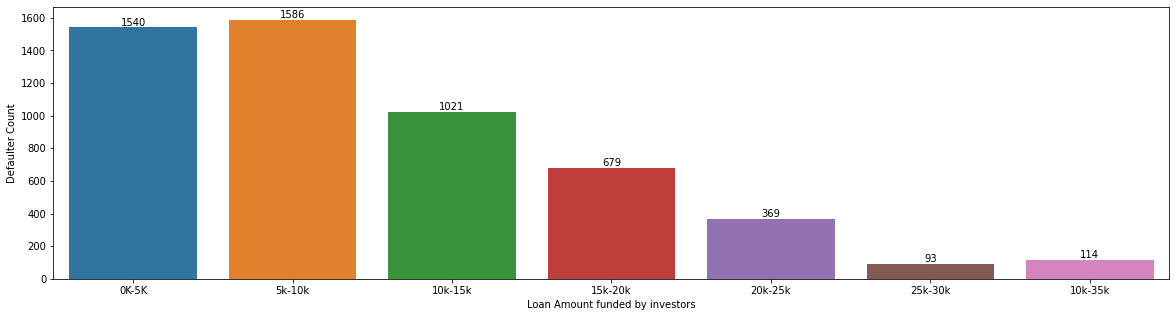

In [58]:

#Distribution of loan deafulters across loan amount funded by investors groups 
fig, ax = plt.subplots(figsize=(20, 5))
ax=sns.countplot(x='funded_amnt_inv_grp', data=loan_8[loan_8['loan_status']=='Charged Off'],ax=ax)
ax.bar_label(ax.containers[0])
ax.set_ylabel('Defaulter Count')
ax.set_xlabel('Loan Amount funded by investors')

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '0-200'),
  Text(1, 0, '200-400'),
  Text(2, 0, '400-600'),
  Text(3, 0, '600-800'),
  Text(4, 0, '800-1000'),
  Text(5, 0, '1000-1200'),
  Text(6, 0, '1200-1400')])

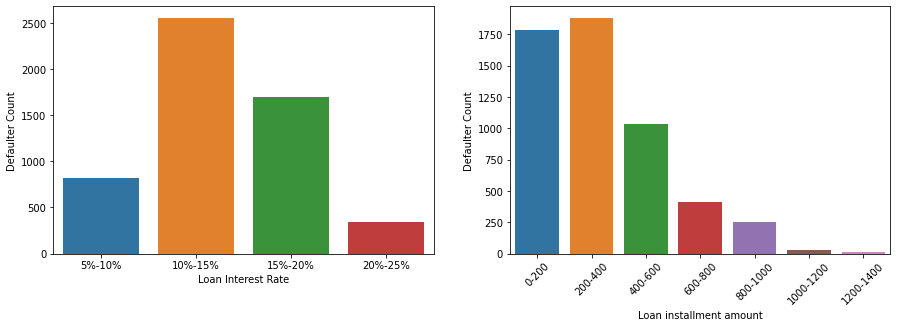

In [59]:
#Distribution of loan deafulters across loan interest rate 
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(x='int_rate_grp', data=loan_8[loan_8.loan_status == 'Charged Off'])
plt.xlabel('Loan Interest Rate')
plt.ylabel('Defaulter Count')
#Distribution of loan deafulters across loan installment amount 
plt.subplot(222)
sns.countplot(x='installment_grp', data=loan_8[loan_8.loan_status == 'Charged Off'])
plt.xlabel('Loan installment amount')
plt.ylabel('Defaulter Count')
plt.xticks(rotation=45)

Text(0, 0.5, 'Defaulter Count')

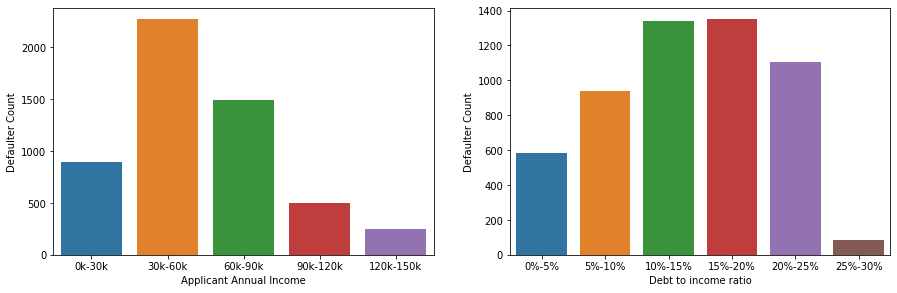

In [60]:
#Distribution of loan deafulters across Applicant Annual Income 
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(x='annual_inc_grp', data=loan_8[loan_8.loan_status == 'Charged Off'])
plt.xlabel('Applicant Annual Income')
plt.ylabel('Defaulter Count')
#Distribution of loan deafulters across Debt to income ratio
plt.subplot(222)
sns.countplot(x='dti_grp', data=loan_8[loan_8.loan_status == 'Charged Off'])
plt.xlabel('Debt to income ratio')
plt.ylabel('Defaulter Count')


In [61]:
loan_8.groupby("annual_inc_grp")["loan_status"].value_counts()
loan_8.groupby("dti_grp")["loan_status"].value_counts()

dti_grp  loan_status
0%-5%    Fully Paid     4004
         Charged Off     585
5%-10%   Fully Paid     6311
         Charged Off     939
10%-15%  Fully Paid     7809
         Charged Off    1339
15%-20%  Fully Paid     7182
         Charged Off    1349
20%-25%  Fully Paid     5368
         Charged Off    1103
25%-30%  Fully Paid      530
         Charged Off      87
Name: loan_status, dtype: int64

Text(0, 0.5, 'Defaulter Count')

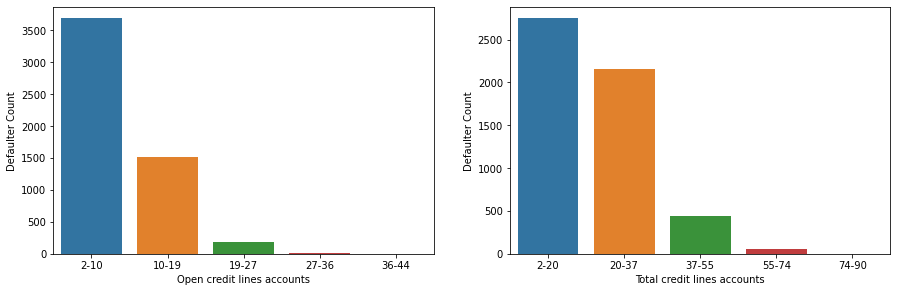

In [62]:
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(x='open_acc_grp', data=loan_8[loan_8.loan_status == 'Charged Off'])
plt.xlabel('Open credit lines accounts')
plt.ylabel('Defaulter Count')
plt.subplot(222)
sns.countplot(x='total_acc_grp', data=loan_8[loan_8.loan_status == 'Charged Off'])
plt.xlabel('Total credit lines accounts')
plt.ylabel('Defaulter Count')


In [63]:
#Extracting month and year from earliest credit line (derived metrics)
loan_8[["earliest_cr_line_month", "earliest_cr_line_year"]] = loan_8["earliest_cr_line"].str.split("-", expand = True)
loan_8["earliest_cr_line_year"]=loan_8["earliest_cr_line_year"].apply(lambda x:"20"+x if int(x)<22 else "19"+x)

(array([  0., 100., 200., 300., 400., 500., 600.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

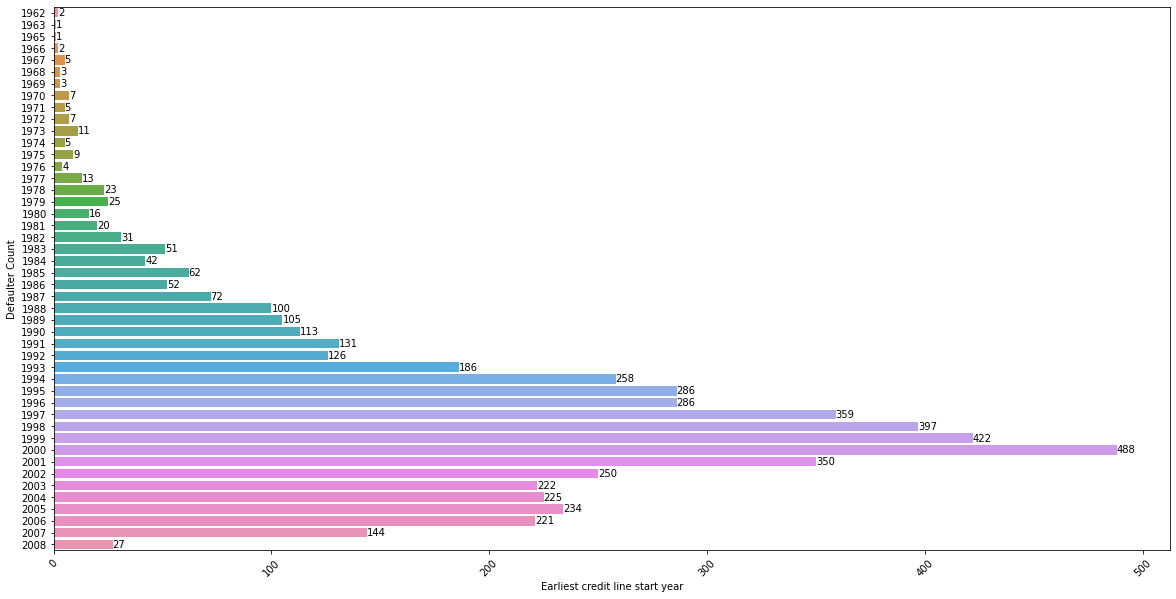

In [64]:
fig, ax = plt.subplots(figsize = (20,10))
ax=sns.countplot(y='earliest_cr_line_year', data=loan_8[loan_8.loan_status == 'Charged Off'].sort_values(by="earliest_cr_line_year"))
plt.xlabel('Earliest credit line start year')
plt.ylabel('Defaulter Count')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45)

We assumed ealier the applicant is applying for loan first time hence earliest_credit_line, open_accnt,total_acc_group variables are related to post loan behaviour of customer hence no significant insight can be drawn

<h3>Univariate Analysis Result</h3>
Defaulter have the following characteristics
<li>Applicants having home owernership status as rented or mortgage (around 92%)
<li>Applicants who had an interest rate in range 10%-15% (~46%)
<li>Applicants who had a annual income in range 30K-60k (42%)
<li>Applicants whose purpose of loan was "debt_consolidation" (~50%)
<li>Applicants whose income was not verified by LC (~39%)
<li>Loan Grade B,C and D had ~70% of the defaulters with B being the highest category of defaulters
<li>Loan subgrade B5 had highest defaulters (358)
<li>Employees working for 10 or more years had the highest deafulters (~28%)
<li>Applicants having Debt to income ratio in range 15%-20% (25%)
<li>Applicants having addr_state as "CA" that is california residents (~20%)
<li>Applicants whose loan was issued in year 2011 (58%)
<li>Applicants who took loan in the month of december 
<li>Applicants who requested/funded by investor for a loan in range 5k-10K (29%)
<li>No significant difference in terms of loan term for Applicants,slight high default rate for loan term as 36 months (57%)
<li>Applicants having 0 pub_rec_bankruptcies and derogatory pub_rec (less data points in public record)






<h1>4.Bivariate Analysis</h1>

In [65]:
loan_8.dtypes

loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                         int64
int_rate                   float64
installment                float64
grade                       object
sub_grade                   object
emp_length                   int64
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
purpose                     object
zip_code                    object
addr_state                  object
dti                        float64
earliest_cr_line            object
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
revol_util                 float64
total_acc                    int64
pub_rec_bankruptcies         int64
loan_month                  object
loan_year                   object
loan_amnt_grp             category
funded_amnt_inv_grp 

<h3>Lets check the correlation matrix of all the numerical columns, to see any significant relationship

In [66]:
corr=loan_8.corr()
corr.style.background_gradient(cmap='coolwarm') 

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.981919,0.936941,0.349442,0.292707,0.931407,0.131205,0.402568,0.089848,0.165385,-0.044241,0.312529,0.070480,0.238147,-0.029129
funded_amnt,0.981919,1.000000,0.954896,0.328610,0.297700,0.957070,0.130888,0.398396,0.089040,0.163400,-0.044917,0.304503,0.074690,0.232911,-0.030178
funded_amnt_inv,0.936941,0.954896,1.000000,0.348296,0.290425,0.902631,0.144124,0.381785,0.096596,0.150750,-0.046412,0.284899,0.079098,0.225465,-0.030757
term,0.349442,0.328610,0.348296,1.000000,0.436447,0.091336,0.100443,0.079824,0.078695,0.043022,0.013058,0.072245,0.063540,0.091985,0.018789
int_rate,0.292707,0.297700,0.290425,0.436447,1.000000,0.270562,-0.013769,0.055497,0.112344,-0.006390,0.104081,0.081853,0.469525,-0.062721,0.088271
installment,0.931407,0.957070,0.902631,0.091336,0.270562,1.000000,0.102717,0.397597,0.078913,0.160165,-0.040305,0.304897,0.102438,0.211465,-0.027076
emp_length,0.131205,0.130888,0.144124,0.100443,-0.013769,0.102717,1.000000,0.160473,0.052603,0.085667,0.074437,0.146958,0.001692,0.198560,0.074646
annual_inc,0.402568,0.398396,0.381785,0.079824,0.055497,0.397597,0.160473,1.000000,-0.073368,0.264505,-0.009213,0.397217,0.046576,0.385762,-0.005458
dti,0.089848,0.089040,0.096596,0.078695,0.112344,0.078913,0.052603,-0.073368,1.000000,0.298570,-0.007012,0.270739,0.277138,0.245701,0.004999
open_acc,0.165385,0.163400,0.150750,0.043022,-0.006390,0.160165,0.085667,0.264505,0.298570,1.000000,0.005271,0.285499,-0.097874,0.683886,0.009974


<h3>It is clear from the matrix that how 'loan_amnt','funded_amnt' & 'funded_amnt_inv' are closely interrelated.So we can take any one column out of them for our analysis.

(annual_inc and loan_amnt),(annual_inc and installments) ,(term and int_rate),(pub_rec and pub_rec_bankruptcy) pairs has positive relationship

<AxesSubplot:xlabel='loan_amnt_grp', ylabel='annual_inc'>

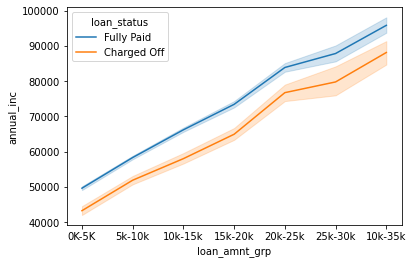

In [67]:
#Loan status across annual income and loan_amount
sns.lineplot(x='loan_amnt_grp', y='annual_inc', hue='loan_status', data=loan_8)

Inference: from the trend we can see for a loan amount group the annual income of charged off was less hence they defaulted

<AxesSubplot:xlabel='term', ylabel='int_rate'>

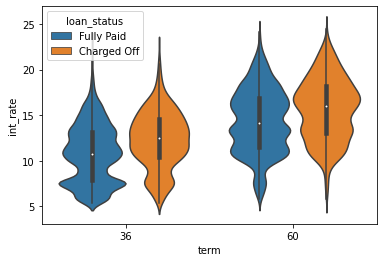

In [95]:
#Loan status across term and interest rate
sns.violinplot(x='term', y='int_rate', hue='loan_status', data=loan_8)

Inference: Most of the loans issued for longer term had higher intrest rates for repayement hence most likely to default

<AxesSubplot:xlabel='term', ylabel='loan_amnt'>

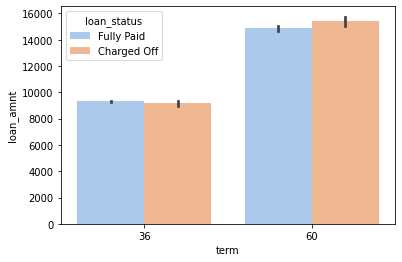

In [68]:
#Loan status across loam amount and term
sns.barplot(x='term', y='loan_amnt', hue='loan_status', data=loan_8,palette="pastel")

Inference: applicants having term of 60 months have higher mean loan amount, positive relation between term and loan amount

<AxesSubplot:xlabel='int_rate_grp', ylabel='loan_amnt'>

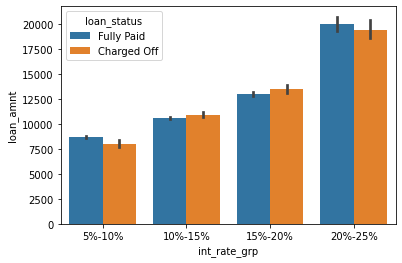

In [69]:
#Loan status across loam amount and interest rate
sns.barplot(x='int_rate_grp', y='loan_amnt', hue='loan_status', data=loan_8)

Inference: applicants having interest rate range of 20%-25% have higher mean loan amount, positive relation between interest rate and loan amount

<AxesSubplot:xlabel='grade', ylabel='loan_amnt'>

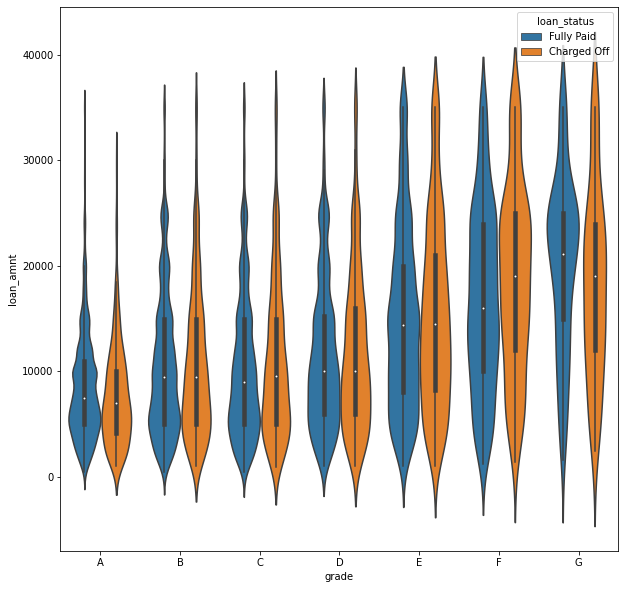

In [70]:
#Loan status across loam amount and loan grade
plt.figure(figsize=(10,10))
sns.violinplot(x='grade', y='loan_amnt', hue='loan_status', data=loan_8.sort_values("grade"))

Inference: applicants having grade greater than C have higher median loan amount and will be more likely to default

<AxesSubplot:xlabel='loan_amnt', ylabel='sub_grade'>

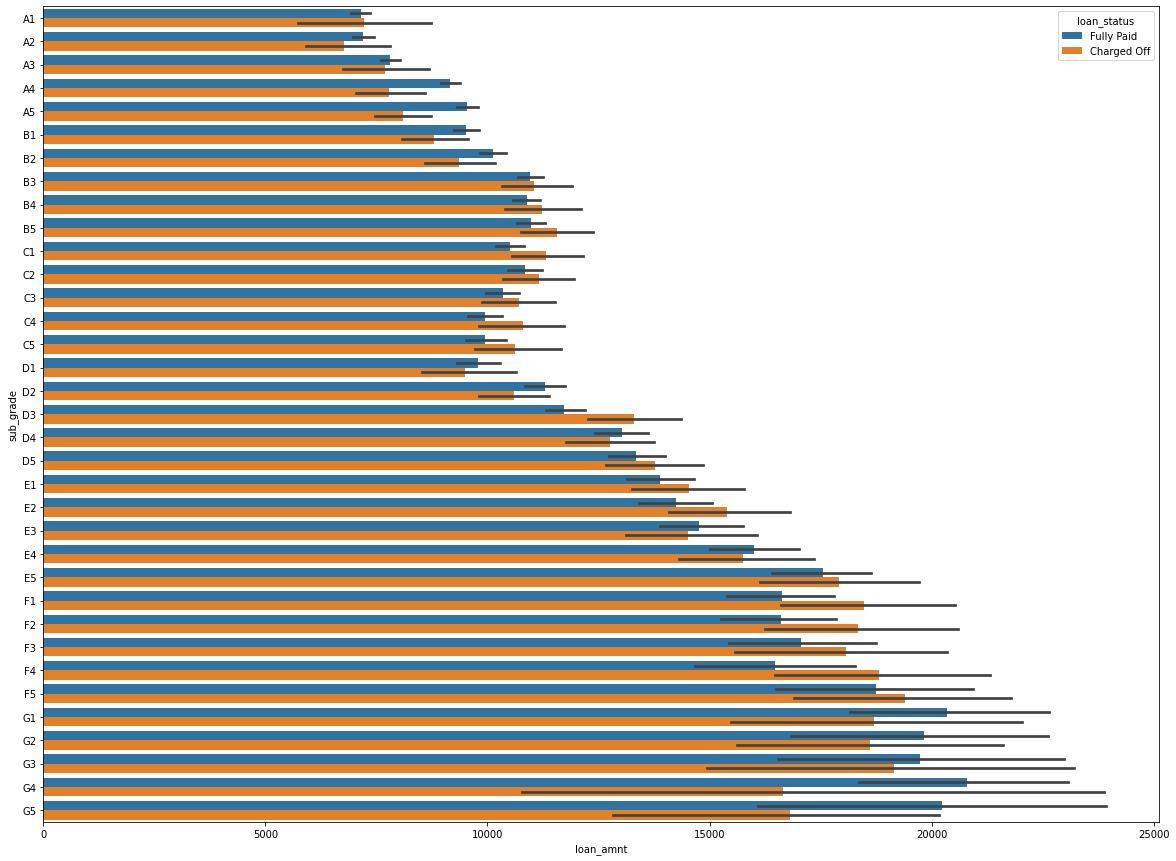

In [71]:
#Loan status across loam amount and laon sub grade
plt.figure(figsize=(20,15))
sns.barplot( data=loan_8.sort_values("sub_grade"), x='loan_amnt',y='sub_grade', hue='loan_status')

Inference: applicants having subgrade greater than D3 have higher mean loan amount and will be more likely to default

<AxesSubplot:xlabel='loan_amnt', ylabel='purpose'>

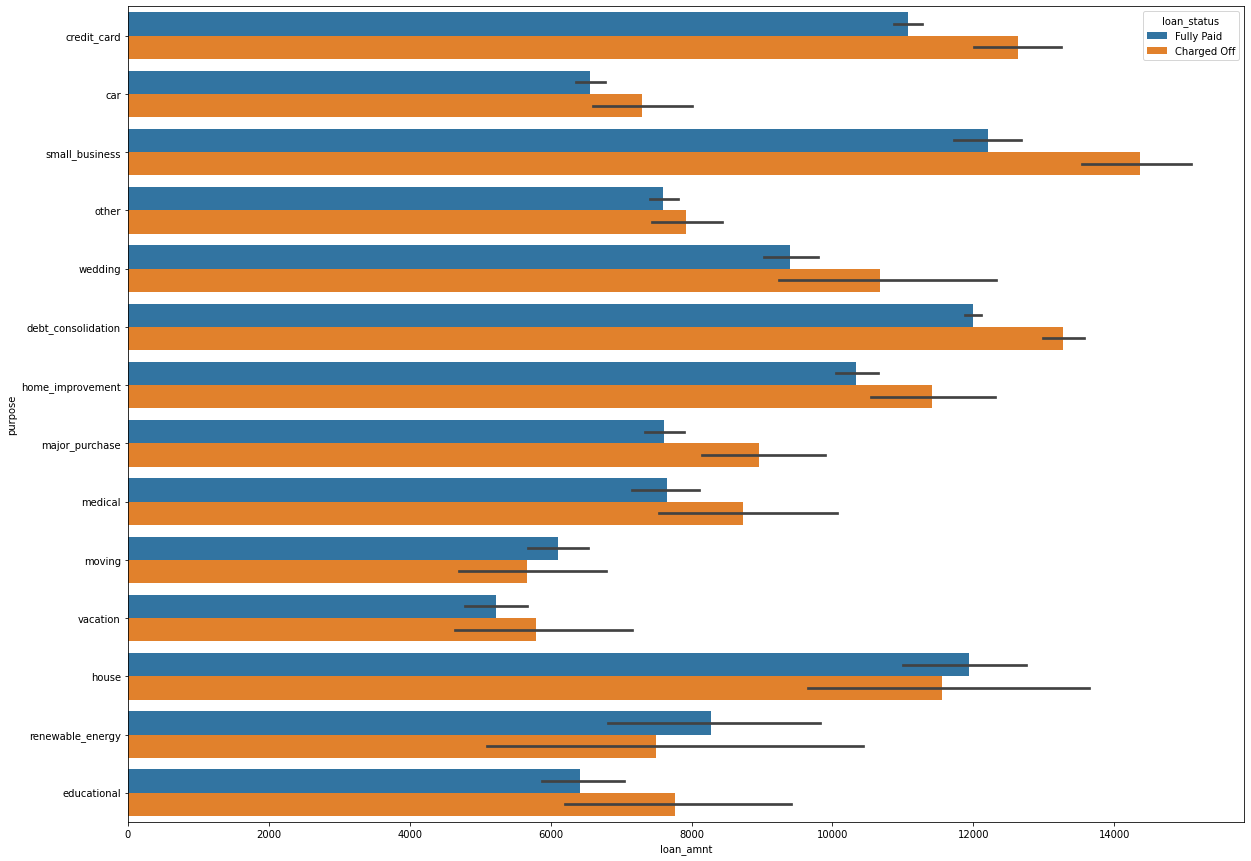

In [72]:
#Loan status across loam amount and purpose
plt.figure(figsize=(20,15))
sns.barplot(y='purpose', x='loan_amnt', hue='loan_status', data=loan_8)

Inference: applicants having loan purpose as small_business have higher mean loan amount and will be more likely to default

<AxesSubplot:xlabel='loan_amnt', ylabel='dti_grp'>

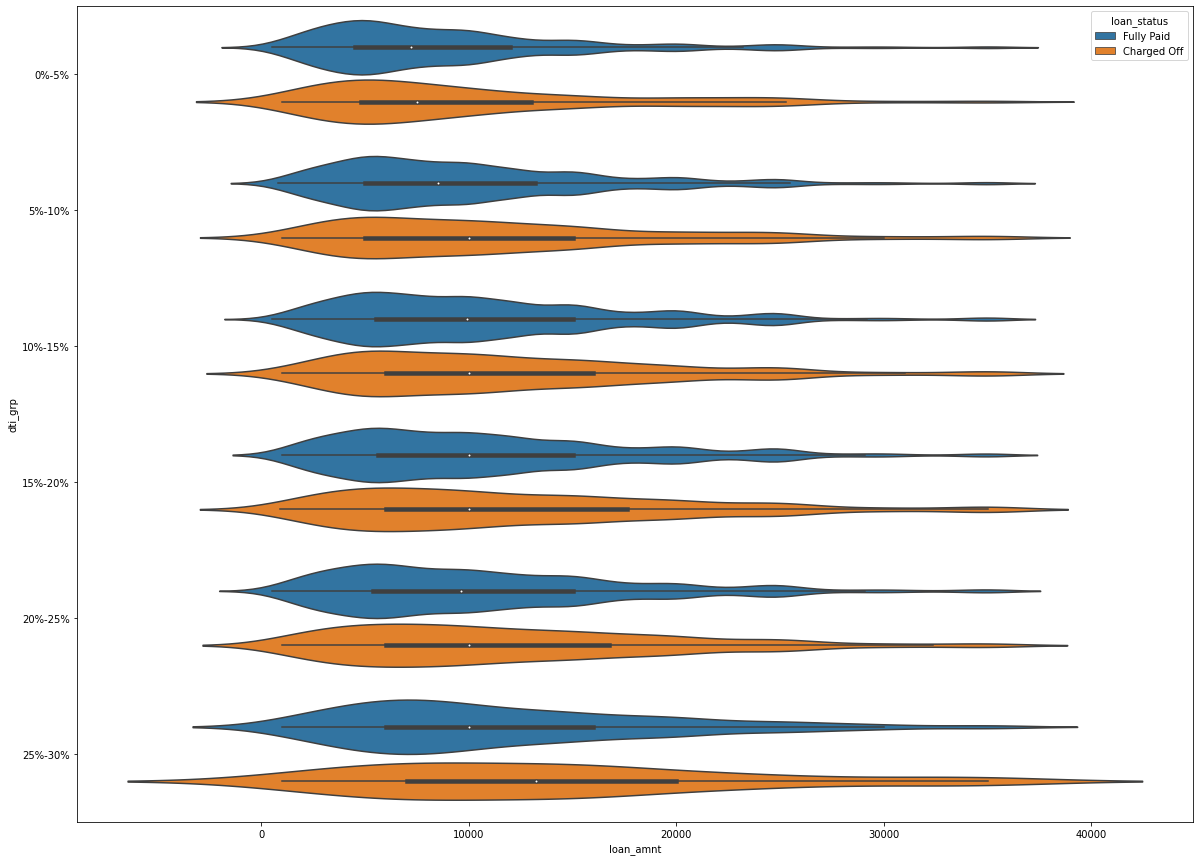

In [73]:
#Loan status across loam amount and DTI
plt.figure(figsize=(20,15))
sns.violinplot(y='dti_grp', x='loan_amnt', hue='loan_status', data=loan_8)

Inference: applicants having dti in range 25%-30% have higher mean loan amount and will be more likely to default

<AxesSubplot:xlabel='emp_length', ylabel='loan_amnt'>

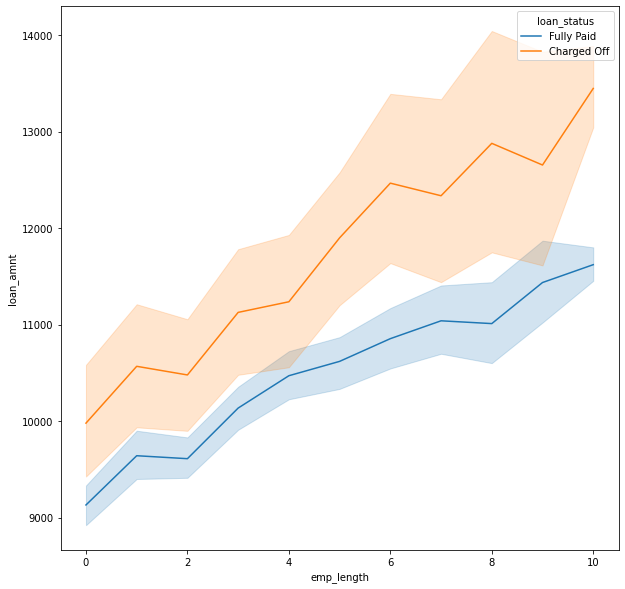

In [74]:
#Loan status across loam amount and emp_length
plt.figure(figsize=(10,10))
sns.lineplot(x='emp_length', y='loan_amnt', hue='loan_status', data=loan_8)

Inference: applicants (defaulters) took higher mean loan amount compared to "fully paid" applicants across all employement length

<AxesSubplot:xlabel='loan_month', ylabel='loan_amnt'>

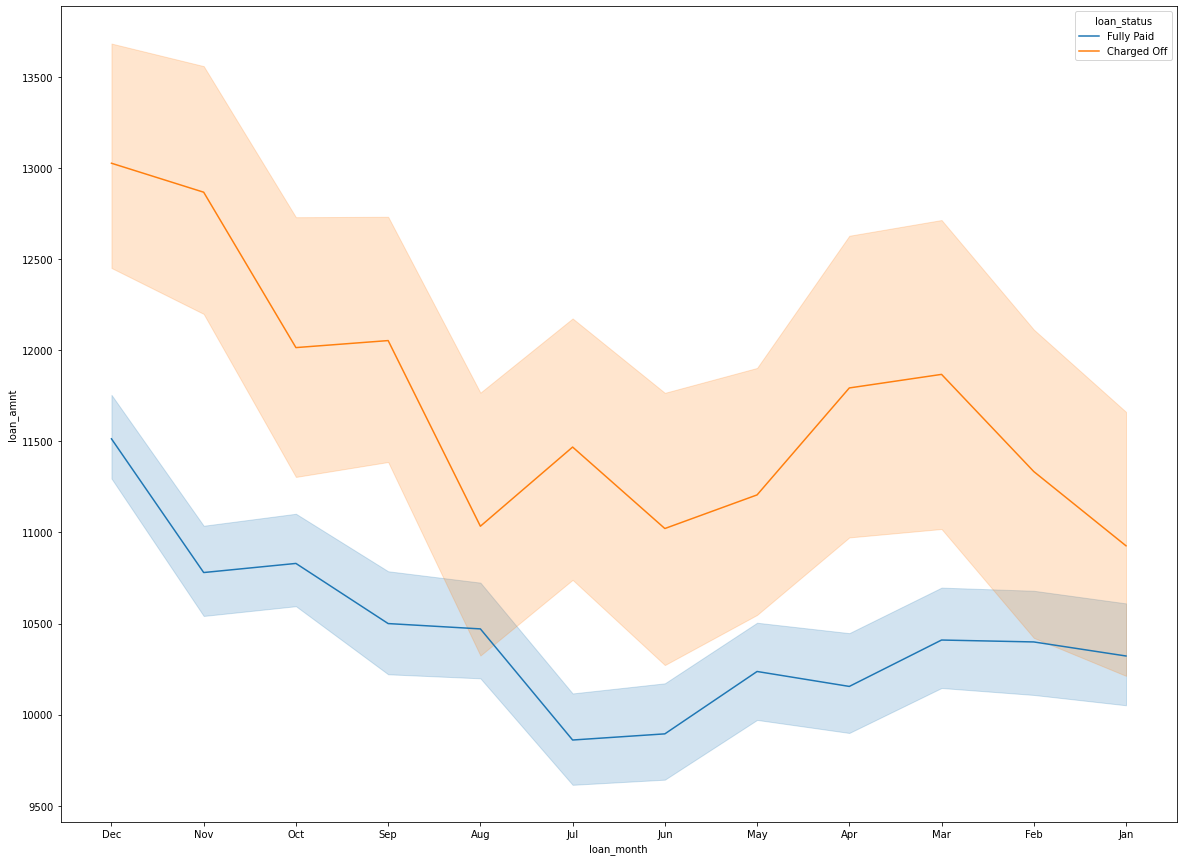

In [75]:
#Loan status across loam amount and loan_month
plt.figure(figsize=(20,15))
sns.lineplot(x='loan_month', y='loan_amnt', hue='loan_status', data=loan_8)

Inference: applicants having got loan issued in month of december have higher mean loan amount and will be more likely to default

<AxesSubplot:xlabel='home_ownership', ylabel='loan_amnt'>

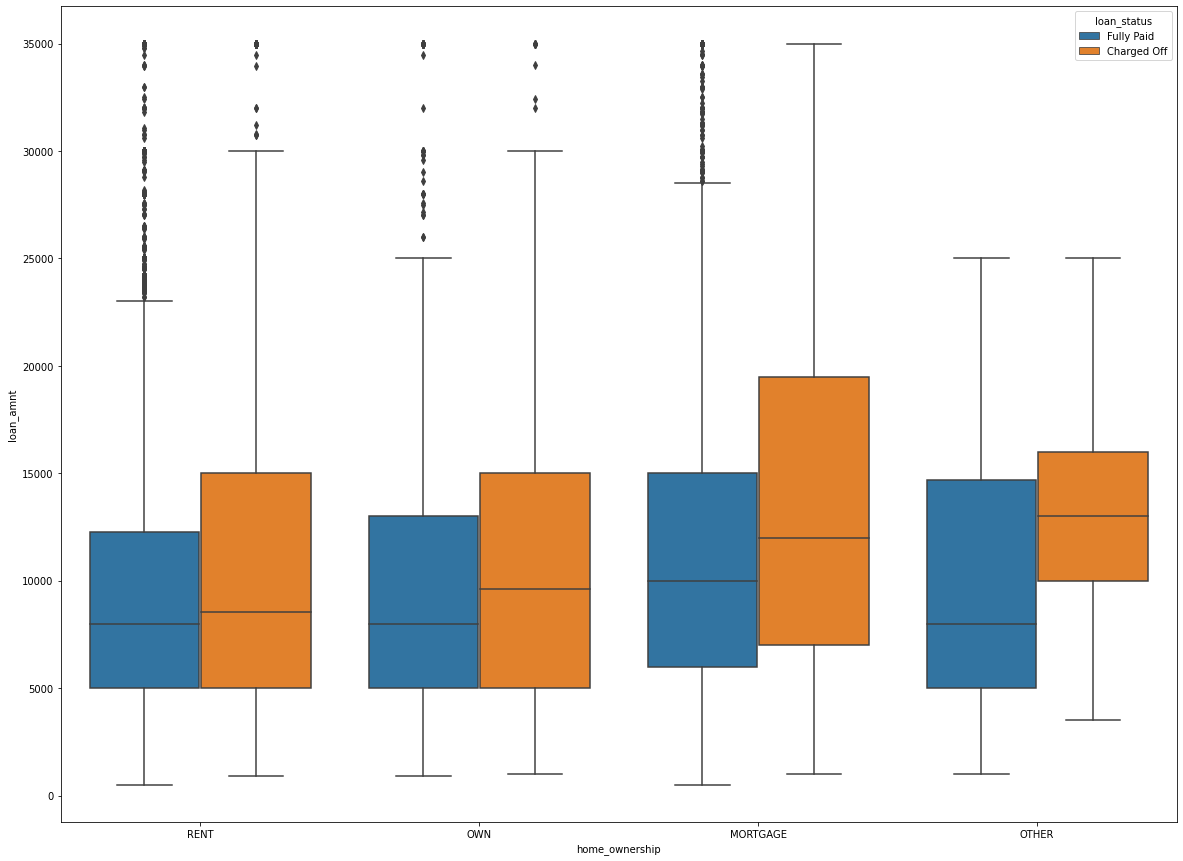

In [76]:
#Loan status across loam amount and home ownership
plt.figure(figsize=(20,15))
sns.boxplot(x='home_ownership', y='loan_amnt', hue='loan_status', data=loan_8)

Inference: applicants having home_ownership status as "others" have higher median loan amount and its 25th percentile value is quite high compared to "fully paid" hence will be more likely to default

<AxesSubplot:xlabel='verification_status', ylabel='loan_amnt'>

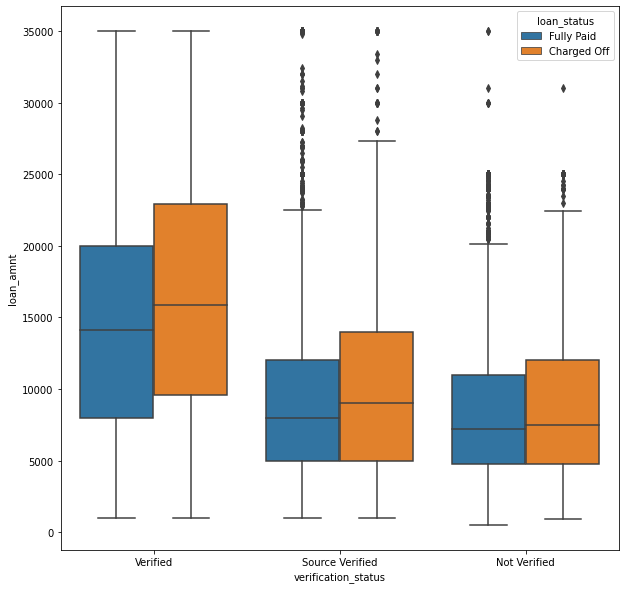

In [77]:
#Loan status across loam amount and verification_status
plt.figure(figsize=(10,10))
sns.boxplot(x='verification_status', y='loan_amnt', hue='loan_status', data=loan_8)

Inference: applicants having verfication status as "verified" have higher mean loan amount and its 75th percentile is quite high compared to "fully paid" hence will be more likely to default

<AxesSubplot:xlabel='verification_status', ylabel='emp_length'>

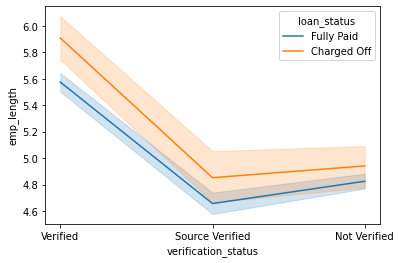

In [78]:
#Loan status across verification_status and employment duration of applicant
sns.lineplot(x='verification_status', y='emp_length', hue='loan_status', data=loan_8)

Inference: applicants having verfication status as "verified" have higher mean emplyment length  and will be more likely to default

<AxesSubplot:xlabel='verification_status', ylabel='dti'>

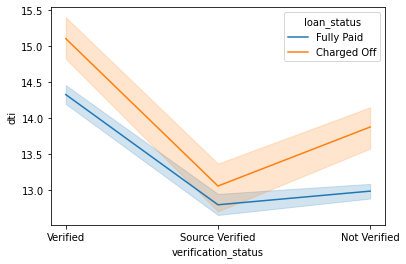

In [79]:
#Loan status across verification_status and dti
sns.lineplot(x='verification_status', y='dti', hue='loan_status', data=loan_8)

<AxesSubplot:xlabel='verification_status', ylabel='annual_inc'>

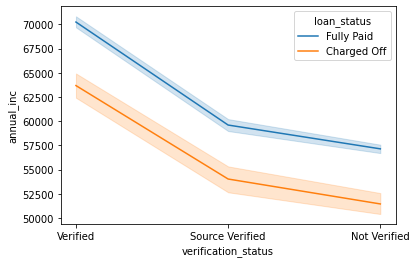

In [80]:
#Loan status across verification_status and annula income
sns.lineplot(x='verification_status', y='annual_inc', hue='loan_status', data=loan_8)

<AxesSubplot:xlabel='verification_status', ylabel='int_rate'>

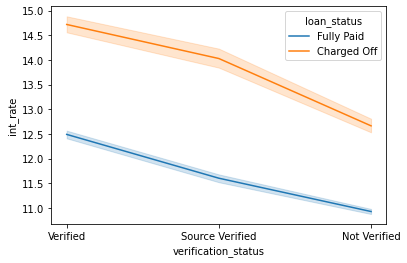

In [81]:
#Loan status across verification_status and interst rate
sns.lineplot(x='verification_status', y='int_rate', hue='loan_status', data=loan_8)

Inference: Applicants with verification_status as "verified" have high mean dti, annual income and interest rate and will most likely default

<AxesSubplot:xlabel='home_ownership', ylabel='annual_inc'>

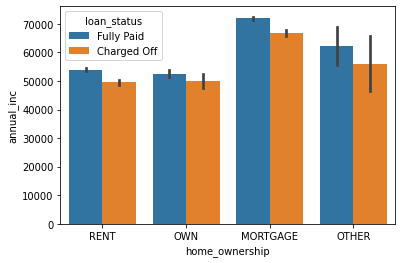

In [82]:
#Loan status across home_ownership and annual income
sns.barplot(x='home_ownership', y='annual_inc', hue='loan_status', data=loan_8)

<AxesSubplot:xlabel='home_ownership', ylabel='dti'>

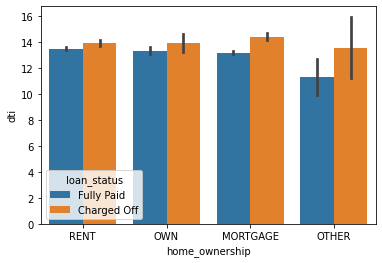

In [83]:
#Loan status across home_ownership and dti
sns.barplot(x='home_ownership', y='dti', hue='loan_status', data=loan_8)

<AxesSubplot:xlabel='home_ownership', ylabel='emp_length'>

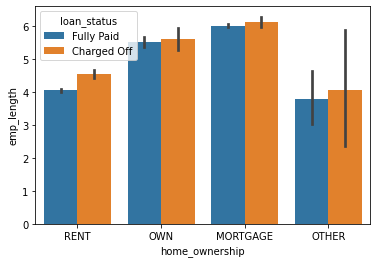

In [84]:
#Loan status across home_ownership and emp_length
sns.barplot(x='home_ownership', y='emp_length', hue='loan_status', data=loan_8)

Inference: Applicants with home_ownership as "Mortage" have high mean employment duration,dti and annual income and will most likely default

<AxesSubplot:xlabel='int_rate', ylabel='purpose'>

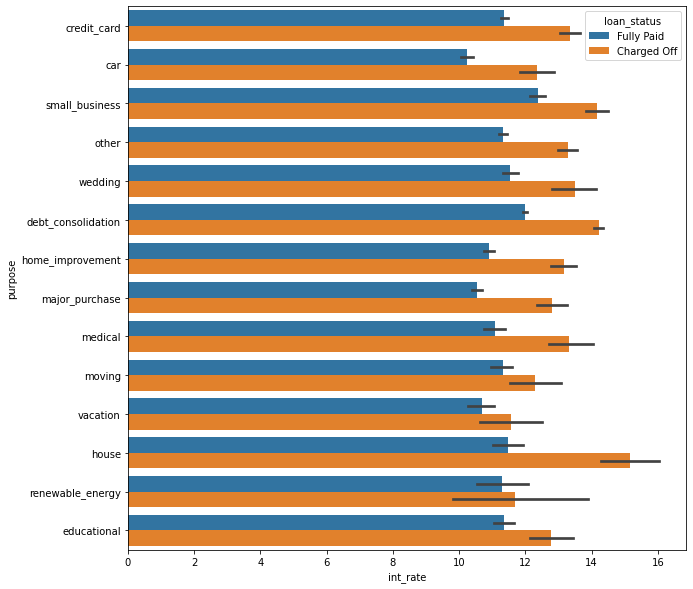

In [107]:
#Loan status across purpose and interest rate
plt.figure(figsize=(10,10))
sns.barplot(y='purpose', x='int_rate', hue='loan_status', data=loan_8)

<AxesSubplot:xlabel='annual_inc', ylabel='purpose'>

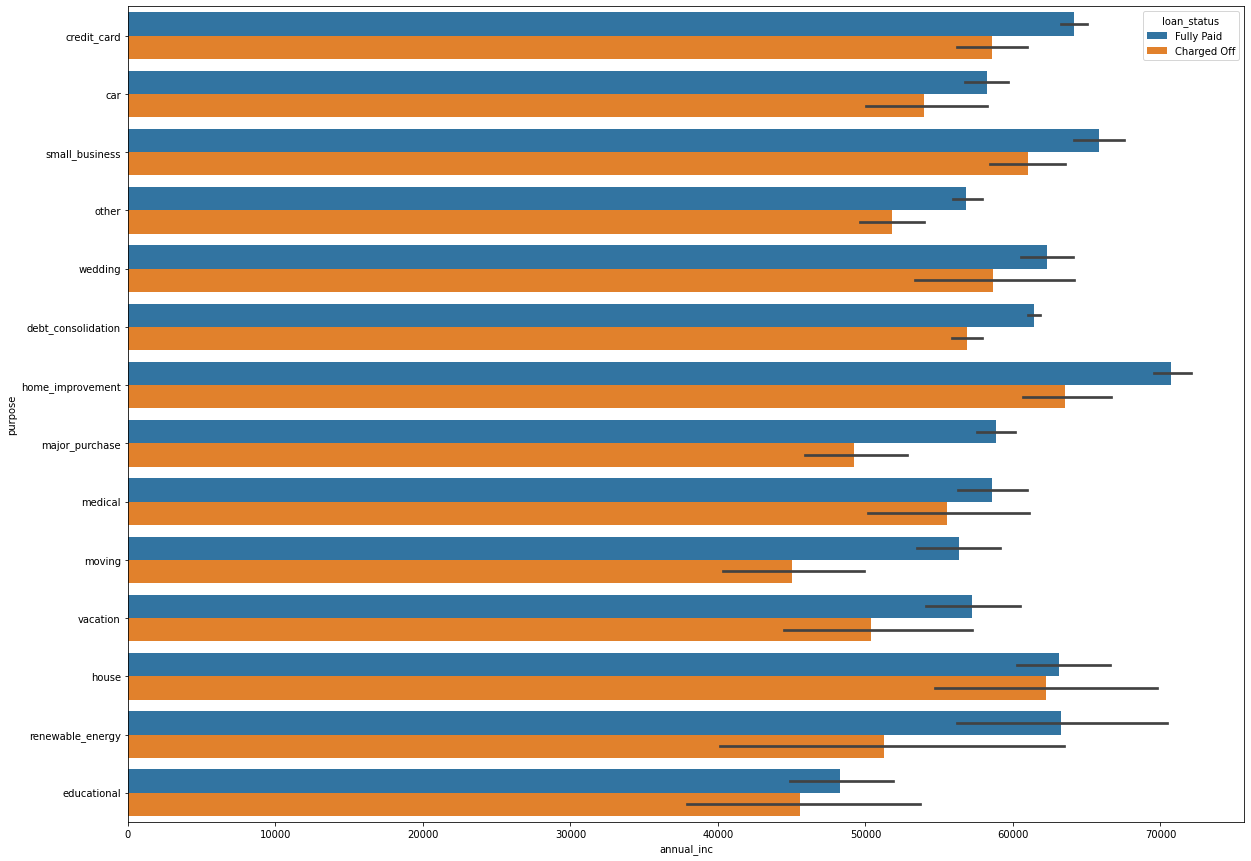

In [86]:
#Loan status across purpose and annual_inc

plt.figure(figsize=(20,15))
sns.barplot(y='purpose', x='annual_inc', hue='loan_status', data=loan_8)

<AxesSubplot:xlabel='dti', ylabel='purpose'>

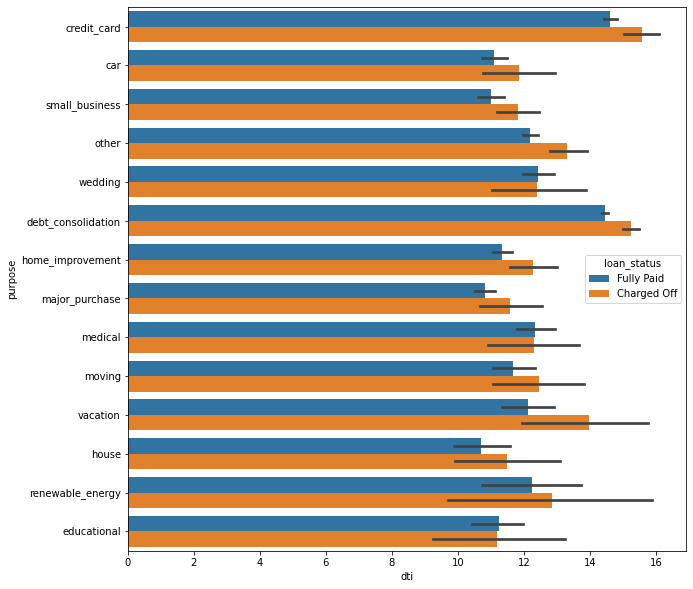

In [106]:
#Loan status across purpose and dti
plt.figure(figsize=(10,10))
sns.barplot(y='purpose', x='dti', hue='loan_status', data=loan_8)

Inference: Applicants with purpose as "credit cards" have high mean dti and will most likely default

<AxesSubplot:xlabel='emp_length', ylabel='purpose'>

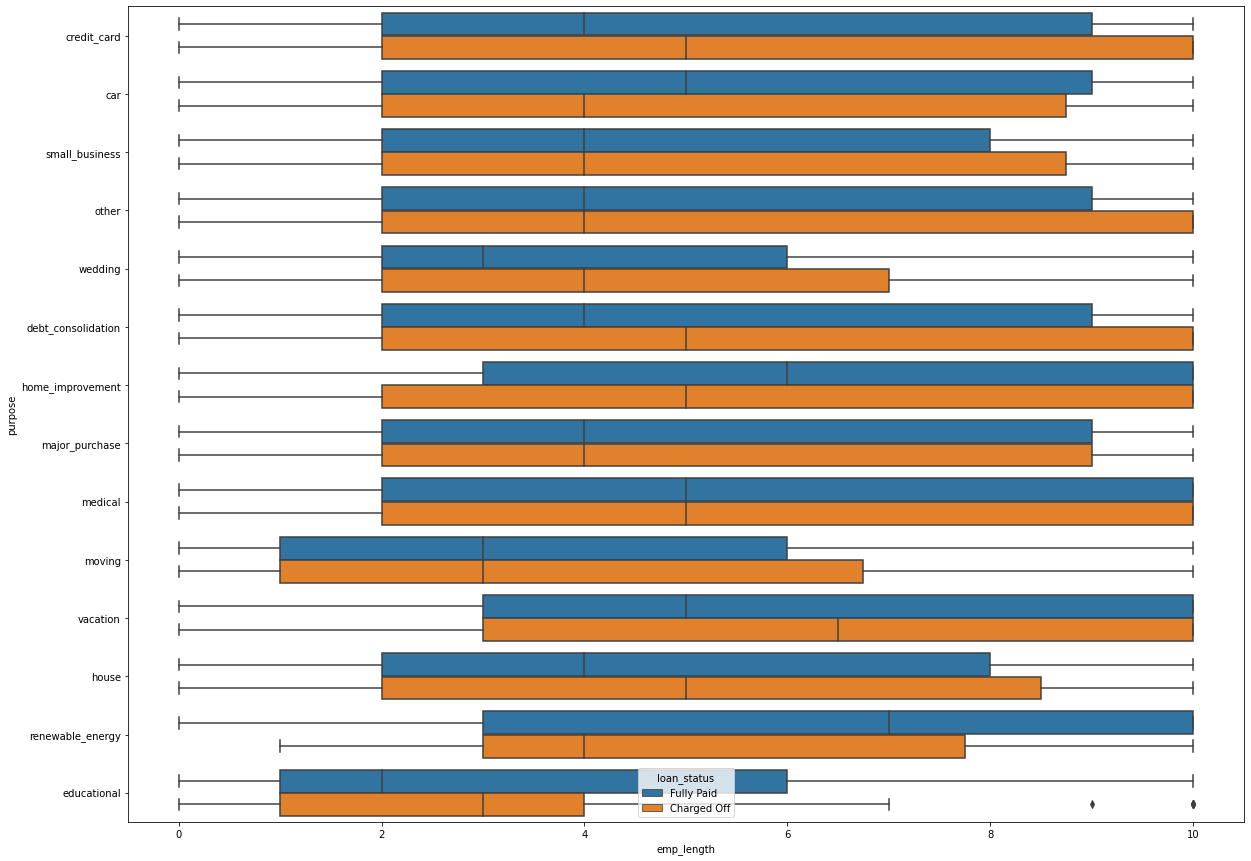

In [88]:
#Loan status across purpose and employee length
plt.figure(figsize=(20,15))
sns.boxplot(y='purpose', x='emp_length', hue='loan_status', data=loan_8)

Inference: Applicants with pupose debt_consolidation had 50 percentile of its population with employment duration of 5 years or less and will most likely default

<AxesSubplot:xlabel='grade', ylabel='emp_length'>

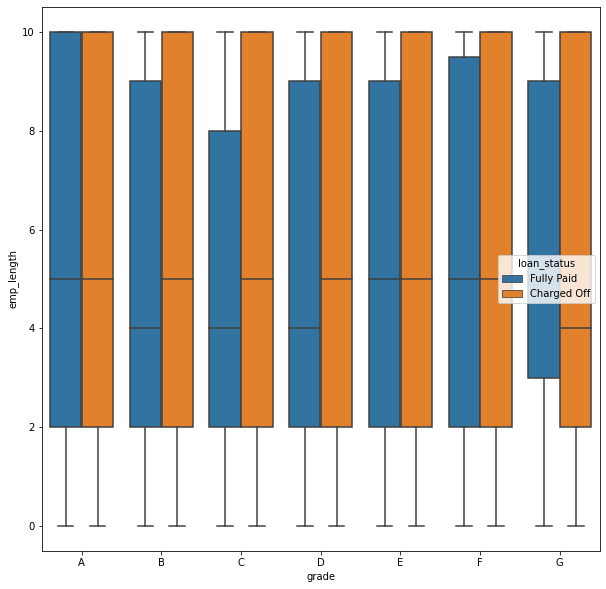

In [89]:
#Loan status across grade and employee length
plt.figure(figsize=(10,10))
sns.boxplot(x='grade', y='emp_length', hue='loan_status', data=loan_8.sort_values("grade"))

<AxesSubplot:xlabel='grade', ylabel='dti'>

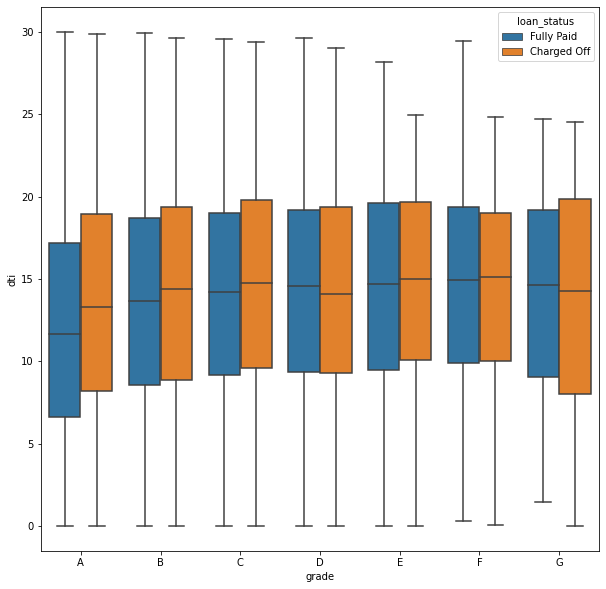

In [90]:
#Loan status across grade and dti
plt.figure(figsize=(10,10))
sns.boxplot(x='grade', y='dti', hue='loan_status', data=loan_8.sort_values("grade"))

Inference: No significant insight

<AxesSubplot:xlabel='grade', ylabel='annual_inc'>

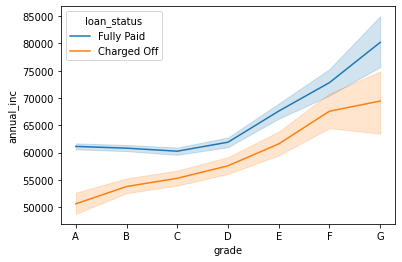

In [91]:
#Loan status across grade and annual income
sns.lineplot(x='grade', y='annual_inc', hue='loan_status', data=loan_8.sort_values("grade"))

Inference: Applicants with lower annual income across all loans grade are most likely to default 

<AxesSubplot:xlabel='grade', ylabel='int_rate'>

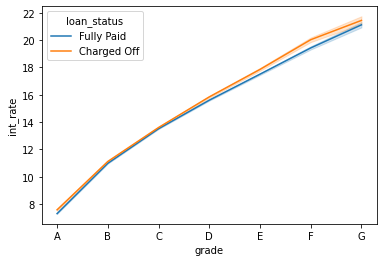

In [92]:
#Loan status across grade and interest rate
sns.lineplot(x='grade', y='int_rate', hue='loan_status', data=loan_8.sort_values("grade"))

Inference: Applicants get higher interest rate for higher catogory loan and hence will most likely default for higher category loan